# House Prices - Advanced Regression Techniques (Kaggle)

Input files - [Downloaded here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)
1. *train.csv*
2. *test.csv*


In [17]:
### set up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

pd.options.display.max_rows = 100

In [2]:
### load data
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

In [3]:
train_raw.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# train.info()
train_raw.shape
train_raw.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [5]:
train_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
### find columns with NaN - note python also treats None as na
cols_w_nan = train_raw.columns[train_raw.isna().any()]
train_raw[cols_w_nan].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

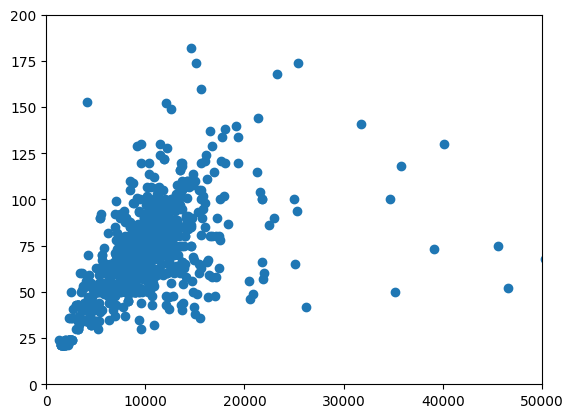

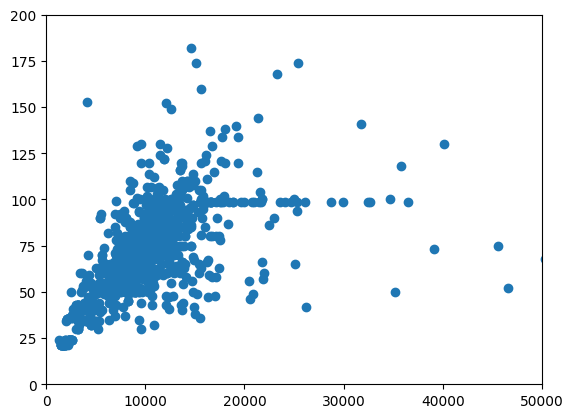

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64


In [69]:
### remove NaN
## fixed na fill
nan_fill_fixed = {'Alley':'NoAlley', 'MasVnrType':'NoMasVnr', 'MasVnrArea':0, 'BsmtQual':'NoBsmt', 'BsmtCond':'NoBsmt',
                  'BsmtExposure':'NoBsmt', 'BsmtFinType1':'NoBsmt', 'BsmtFinType2':'NoBsmt', 
                  'Electrical':'SBrkr', 'FireplaceQu':'NoFire', 'GarageType':'NoGarage',
                  'GarageYrBlt':0, 'GarageFinish':'NoGarage', 'GarageQual':'NoGarage',
                  'GarageCond':'NoGarage', 'PoolQC':'NoPool', 'Fence':'NoFence', 'MiscFeature':'NoMisc'}
train = train_raw.fillna(nan_fill_fixed)

## adhoc analysis
# train.Electrical.value_counts()
# train.MasVnrType.value_counts()

## columns that need further investigation/shouldn't have fixed replacement:
## LotFrontage - LotArea and Lot Frontage approx linear relationship below <15k, for 15k+ LotArea, just use average Lot Frontage  
plt.scatter(train_raw.LotArea, train_raw.LotFrontage)
plt.xlim(0,50000)
plt.ylim(0,200)
plt.show()

##### figure out how to fill LotFrontage NA with linear regession ######
train_lotareafrontage = train[train['LotArea'] <= 15000].dropna(subset=['LotArea', 'LotFrontage'])
lotareafrontage_lm = LinearRegression().fit(train_lotareafrontage['LotArea'].values.reshape(-1, 1), 
                                            train_lotareafrontage['LotFrontage'].values)
lotareafrontage_over20k = train[train['LotArea'] > 15000].LotFrontage.mean()

for i, row in train.iterrows():
    if train.LotFrontage.isna().iloc[i]:
        if train.LotArea.iloc[i] <= 15000:
            lm_pred = lotareafrontage_lm.predict(np.array(row['LotArea']).reshape(1, -1))
            train.at[i, 'LotFrontage'] = lm_pred
        else:
            train.at[i, 'LotFrontage'] = lotareafrontage_over20k

plt.scatter(train.LotArea, train.LotFrontage)
plt.xlim(0,50000)
plt.ylim(0,200)
plt.show()

## check all NaN have been removed
print(train[cols_w_nan].isna().sum())

In [8]:
### convert object columns to categorical?


### convert MSSubClass to category
train.MSSubClass = train.MSSubClass.astype('category')

### one-hot encoding?
# X = pd.get_dummies(df.iloc[:,0:6], drop_first=True)